>В видео эксперт называет задачу регрессии **задачей прогнозирования**. Ранее, в модуле «ML-1. Теория машинного обучения», под задачей прогнозирования мы понимали отдельную ветвь задачи регрессии — предсказание будущего поведения временного ряда.

>В этом нет ничего страшного: такая взаимозаменяемость терминов является довольно распространённой. В таком случае для указания контекста предсказания именно временного ряда говорят «прогнозирование временных рядов».

✍ С алгоритмом МНК мы познакомились. Теперь можем перейти к задаче регрессии. Начнём с её постановки.

В задаче регрессии обычно есть **целевая переменная**, которую мы хотим предсказать. Её, как правило, обозначают буквой $y$. Помимо целевой переменной, есть **признаки** (их также называют **факторами** или **регрессорами**). Пусть их будет $k$ штук:

$y$ — целевая переменная

$x_1,x_2, … ,x_k$ — признаки/факторы/регрессоры

Поставить задачу — значит ответить на два вопроса:

* Что у нас есть?
* Что мы хотим получить?
Ответим на них ↓

В задаче регрессии есть $N$ (как правило, их действительно много) наблюдений. Это наша обучающая выборка или датасет, представленный в виде таблицы. В столбцах таблицы располагаются векторы признаков $\vec{x_i}$.

$$\begin{gathered} \vec{y} \in \mathbb{R}^N \\ \overrightarrow{x_1}, \overrightarrow{x_2}, \ldots, \overrightarrow{x_k} \in \mathbb{R}^N \\ \left(\begin{array}{c} y_1 \\ y_2 \\ \ldots \\ y_N \end{array}\right), \quad\left(\begin{array}{c} x_{11} \\ x_{12} \\ \ldots \\ x_{1 N} \end{array}\right), \ldots,\left(\begin{array}{c} x_{k 1} \\ x_{k 2} \\ \ldots \\ x_{k N} \end{array}\right) \end{gathered}$$

То есть и целевая переменная, и признаки представлены векторами из векторного пространства $\mathbb{R}^N$ — каждого вектора $N$ координат.

В качестве регрессионной модели мы будем использовать **модель линейной регрессии**. Мы предполагаем, что связь между целевой переменной и признаками линейная. Это означает, что:

$$y=w_0+w_1x_1+w_2x_2+…+w_kx_k,$$

или

$$y=(\vec{w}, \vec{x})$$

Здесь $\vec{w}=(w_0,w_1,…,w_k)^T$ обозначают веса (коэффициенты уравнения линейной регрессии), а $\vec{x}=(1,x_1, x_2,…, x_k)^T$.

→ Наличие коэффициента $w_{0}$ говорит о том, что мы строим регрессию с константой, или, как ещё иногда говорят, с **интерсептом.**

**?**

Пока что коэффициенты $w$ нам неизвестны. Как же их найти?

Для этого у нас есть $N$ наблюдений — обучающий набор данных.

Давайте попробуем подобрать такие веса $w$, чтобы для каждого наблюдения наше равенство было выполнено. Таким образом, получается $N$ уравнений на $k+12$ неизвестную.

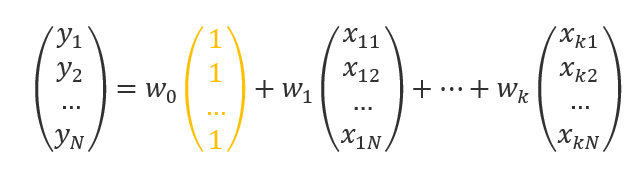

Или в привычном виде систем уравнений:

$$\left\{\begin{array}{c} w_0 1+w_1 x_{11}+\cdots+w_k x_{k 1}=y_1 \\ w_0 1+w_1 x_{12}+\cdots+w_k x_{k 2}=y_2 \\ \cdots \\ w_0 1+w_1 x_{1 N}+\cdots+w_k x_{k N}=y_N \end{array}\right.$$

Говоря на языке машинного обучения, мы хотим обучить такую модель, которая описывала бы зависимость целевой переменной от факторов на обучающей выборке.

Как правило, $N$ гораздо больше $k$ (количество строк с данными в таблице намного больше количества столбцов) и система переопределена, значит точного решения нет. Поэтому можно найти только приближённое.

>**Примечание.** Полученной СЛАУ можно дать геометрическую интерпретацию. Если представить каждое наблюдение в виде точки на графике (см. ниже), то уравнение линейной регрессии будет задавать прямую (если фактор один) или гиперплоскость (если факторов  штук). Приравняв уравнение прямой к целевому признаку, мы потребовали, чтобы эта прямая проходила через все точки в нашем наборе данных. Конечно же, это условие не может быть выполнено полностью, так как в данных всегда присутствует какой-то шум, и идеальной прямой (гиперплоскости) не получится, но зато можно построить приближённое решение.

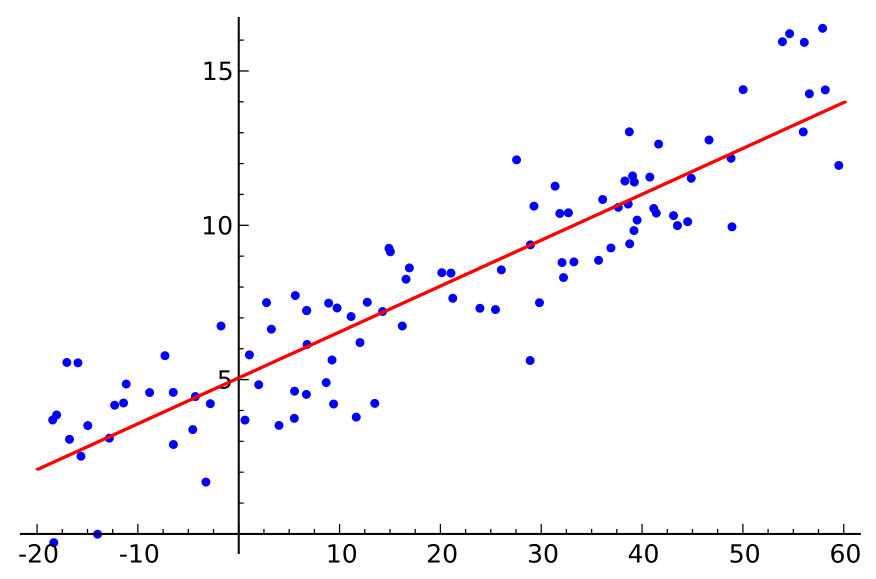

>**Обратите внимание**, что у нас появился **новый вектор** из единиц. Он здесь из-за того, что мы взяли модель с интерсептом. Можно считать, что это новый **регрессор-константа**. Данная константа тянется из уравнения прямой, которое мы разбирали в модуле «ML-2. Обучение с учителем: регрессия».

Мы уже умеем решать переопределённые системы, для этого мы должны составить матрицу системы A, записав в столбцы все наши регрессоры, включая регрессор константу:

$$\begin{aligned} &A=\left(\begin{array}{cccc} 1 & x_{11} & \ldots & x_{k 1} \\ 1 & x_{12} & \ldots & x_{k 2} \\ \ldots & \ldots & \ldots & \ldots \\ 1 & x_{1 N} & \ldots & x_{k N} \end{array}\right) \quad N_{\text {строк }}\\ &k+1 \text { столбец } \end{aligned}$$

>**Примечание.** В контексте задач машинного обучения матрица $A$ называется **матрицей наблюдений** или же **матрицей признаков**: по строкам отложены наблюдения (объекты), а по столбцам — характеризующие их признаки. В модулях по машинному обучению мы в основном обозначали её за $X$. Здесь же мы будем придерживаться традиций линейной алгебры и обозначать матрицу за $A$.

>**Примечание.** Обратите внимание, что индексация матрицы $A$ отличается от привычной нам индексации матрицы. Например, здесь $x_{12}$ — второе наблюдение первого регрессора. Это чистая формальность. Если обозначать за первый индекс номер наблюдения, а за второй индекс — номер регрессора, мы получим привычную нам нумерацию элементов матрицы (строка-столбец).

Осталось записать финальную формулу OLS-оценки для коэффициентов:

$$\hat{\vec{w}} = (A^T A)^{-1} A^T \vec{y}$$

→ Казалось бы, задача решена, однако это совсем не так, ведь мы искали коэффициенты не просто так, а чтобы сделать прогноз — предсказание на новых данных.

Допустим, у нас есть новое наблюдение по регрессорам, которое характеризуется признаками $\vec{x}_{NEW} = (x_{1, NEW}, x_{2, NEW}, ..., x_{k, NEW})^T$. Тогда, предсказание будет строиться следующим образом:

$$\vec{x}_{NEW} = (x_{1, NEW}, x_{2, NEW}, ..., x_{k, NEW})^T$$

или

$$\vec{y}_{NEW} = (\hat{\vec{w}}, \vec{x}_{NEW})$$

Теперь перейдём от формул к **практике** и решим задачу в контексте.

**?**

Рассмотрим классический датасет для обучения линейной регрессии — Boston Housing. В нём собраны усреднённые данные по стоимости недвижимости в 506 районах Бостона. Ниже вы видите фрагмент датасета.

>**Примечание.** С данным датасетом мы знакомились, когда говорили о модели линейной регрессии в модуле «ML-2. Обучение с учителем: регрессия».

Целевой переменной будет **PRICE** — это, в некотором смысле, типичная (медианная) стоимость дома в районе.

Для примера возьмём в качестве регрессоров уровень преступности (**CRIM**) и среднее количество комнат в доме (**RM**).

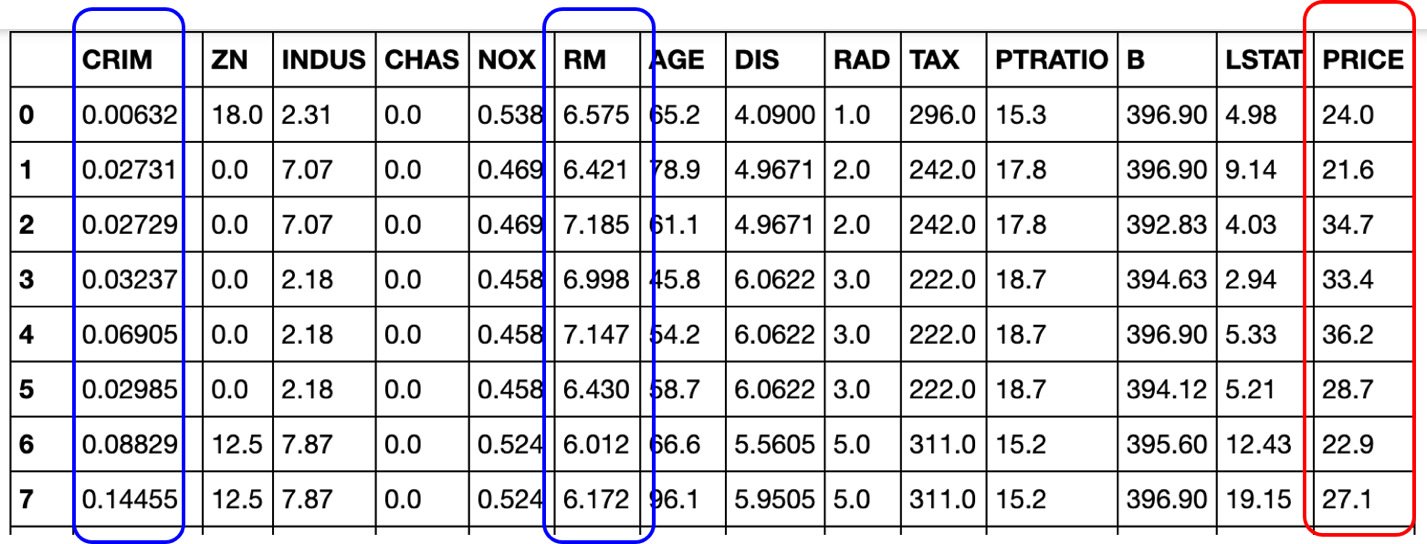

Запишем нашу модель:

$$y=w_0+w_1 \cdot x_1+w_2 \cdot x_2$$

Для наглядности обозначим:

$$y=w_0+w_1 \cdot CRIM+w_2 \cdot RM$$

Составим матрицу регрессоров:

$$A=\left(\begin{array}{ccc} 1 & C R I M_1 & R M_1 \\ 1 & C R I M_2 & R M_2 \\ \ldots & \ldots & \ldots \\ 1 & C R I M_N & R M_N \end{array}\right)$$

В нашем случае $N=506$, а $k = 2$. Размерность матрицы $A$ будет равна $dim A =(506, 3)$. Далее мы применяем формулу для вычисления оценок коэффициентов:

$$\hat{\vec{w}} = (A^T A)^{-1} A^T \vec{y}$$

Вычисления к этой задаче мы сделаем в Python ниже, а пока приведём конечный результат. Если сократить запись до двух знаков после точки, получим следующие коэффициенты:

$$\hat{\vec{w}} = (-29.3, \ -0.26, \ 8.4)^T$$

То есть:

$$\hat{w}_0 = -29.3$$
$$\hat{w}_1 = -0.26$$
$$\hat{w}_2 = 8.4$$

Мы можем переписать нашу модель для прогноза:

$$\hat{y} = -29.3 - 0.26 \cdot CRIM + 8.4 \cdot RM$$

Теперь, если у нас появятся новые наблюдения, то есть ещё один небольшой район с уровнем преступности 0.1 на душу населения и средним количеством комнат в доме, равным 8, мы сможем сделать прогноз на типичную стоимость дома в этом районе — 37 тысяч долларов:

$$CRIM_{NEW} = 0.1$$
$$RM_{NEW} = 8$$
$$\hat{y}_{NEW} = -29.3 -0.26 \cdot 0.1 + 8.4 \cdot 8 \approx 37$$

→ Решение на Python

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt


>**Примечание.** В scikit-learn 1.2 датасет о домах в Бостоне был удалён из репозитория библиотеки, поэтому, начиная с этой версии, в результате выполнения кода выше вы можете получить следующую ошибку:

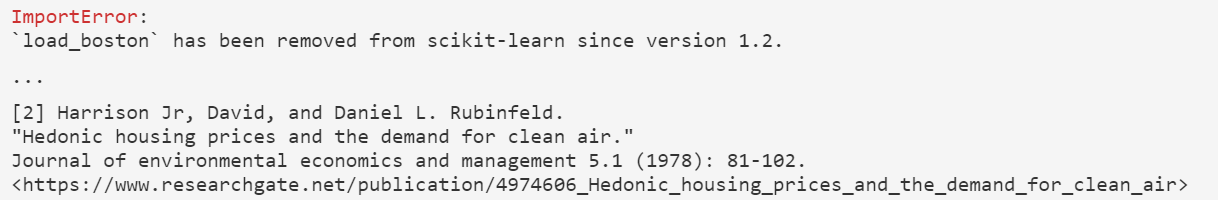

В таком случае, для прохождения материалов модуля вам необходимо скачать файл с данными **[здесь.](https://lms-cdn.skillfactory.ru/assets/courseware/v1/d4accdce7a25600298819f8e28e8d593/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/housing.csv)**

Код для чтения данных в этом случае будет выглядеть следующим образом:

In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Формируем матрицу $A$ из столбца единиц и факторов $CRIM$ и $RM$, а также вектор целевой переменной $y$:

In [5]:
CRIM = boston_data['CRIM']
RM = boston_data['RM']
A = np.column_stack((np.ones(506), CRIM, RM))
y = boston_data[['PRICE']]
print(A)

[[1.0000e+00 6.3200e-03 6.5750e+00]
 [1.0000e+00 2.7310e-02 6.4210e+00]
 [1.0000e+00 2.7290e-02 7.1850e+00]
 ...
 [1.0000e+00 6.0760e-02 6.9760e+00]
 [1.0000e+00 1.0959e-01 6.7940e+00]
 [1.0000e+00 4.7410e-02 6.0300e+00]]


Посмотрим на размерность матрицы $A$:

In [6]:
print(A.shape)
## (506, 3)

(506, 3)


Теперь нам ничего не мешает вычислить оценку вектора коэффициентов $w$ по выведенной нами формуле МНК:

In [7]:
# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-29.24471945]
 [ -0.26491325]
 [  8.39106825]]


Теперь составим прогноз нашей модели:

In [8]:
# добавились новые данные:
CRIM_new = 0.1
RM_new = 8
# делаем прогноз типичной стоимости дома
PRICE_new = w_hat.iloc[0]+w_hat.iloc[1]*CRIM_new+w_hat.iloc[2]*RM_new
print(PRICE_new.values)
## [37.85733519]

[37.85733519]


→ Согласитесь, такая запись вычисления оценки стоимости слишком длинная и неудобная, особенно если факторов не два, как у нас, а 200. Более короткий способ сделать прогноз — вычислить скалярное произведение вектора признаков и коэффициентов регрессии.

Для удобства дальнейшего использования оформим характеристики нового наблюдения в виде матрицы размером $(1,3)$:

In [9]:
new = np.array([[1,CRIM_new,RM_new]])
print('prediction:', (new@w_hat).values)
## prediction: [[37.85733519]]

prediction: [[37.85733519]]


>**Примечание.** Обратите внимание, что, решая задачу с помощью Python, мы получили немного другой результат прогноза стоимости. Это связано с тем, что при выполнении ручного расчёта мы округлили значения коэффициентов и получили менее точный результат.

Мы уже знаем, что алгоритм построения модели линейной регрессии по МНК реализован в классе LinearRegression, находящемся в модуле sklearn.linear_model. Для вычисления коэффициентов (обучения модели) нам достаточно передать в метод fit() нашу матрицу с наблюдениями и вектор целевой переменной, а для построения прогноза — вызвать метод predict():

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(A, y)
print('w_hat:', model.coef_)
new_prediction = model.predict(new)
print('prediction:', new_prediction)
## w_hat: [[-29.24471945  -0.26491325   8.39106825]]
## prediction: [[37.85733519]]

w_hat: [[-29.24471945  -0.26491325   8.39106825]]
prediction: [[37.85733519]]


>**Примечание.** Здесь при создании объекта класса LinearRegression мы указали fit_intercept=False, так как в нашей матрице наблюдений $A$ уже присутствует столбец с единицами для умножения на свободный член $w_{0}$. Его повторное добавление не имеет смысла.

Получили те же результаты, что и ранее.

## **<center>ПРОБЛЕМЫ В КЛАССИЧЕСКОЙ МНК-МОДЕЛИ**

Заметим, что в уравнении классической OLS-регрессии присутствует очень важный множитель $A^T A$:

$$\vec{w}=\left(A^{T} A\right)^{-1} A^{T}\vec{y}$$

Вы могли заметить, что это матрица Грама значений наших признаков, включая признак-константу.

Вспомним свойства этой матрицы: 

* квадратная (размерности $k+1$ на $k+1$, где $k$ — количество факторов);
* симметричная.

`Как и у любого метода, у классической OLS-регрессии есть свои` **ограничения**. `Если матрица` $A^T A$ `вырождена или близка к вырожденной, то хорошего решения у классической модели не получится. Такие данные называют` **плохо обусловленными.**

**?**

Корректна ли модель классической OLS-регрессии, если

$$\vec{y}=\left(\begin{array}{l} 1 \\ 2 \\ 5 \\ 1 \end{array}\right) \overrightarrow{x_1}=\left(\begin{array}{l} 2 \\ 1 \\ 1 \\ 2 \end{array}\right) \overrightarrow{x_2}=\left(\begin{array}{l} -2 \\ -1 \\ -1 \\ -2 \end{array}\right)$$


Запишем матрицу $A$ и вычислим $A^T A$:

$$\begin{gathered} A=\left(\overrightarrow{1}, \overrightarrow{x_1}, \overrightarrow{x_2}\right)=\left(\begin{array}{ccc} 1 & 2 & -2 \\ 1 & 1 & -1 \\ 1 & 1 & -1 \\ 1 & 2 & -2 \end{array}\right) \\ A^T A=\left(\begin{array}{cccc} 1 & 1 & 1 & 1 \\ 2 & 1 & 1 & 2 \\ -2 & -1 & -1 & -1 \end{array}\right)\left(\begin{array}{ccc} 1 & 2 & -2 \\ 1 & 1 & -1 \\ 1 & 1 & -1 \\ 1 & 2 & -2 \end{array}\right)=\left(\begin{array}{ccc} 4 & 6 & -6 \\ 6 & 10 & -10 \\ -6 & -10 & 10 \end{array}\right) \end{gathered}$$

$$\begin{gathered} A=\left(\overrightarrow{1}, \overrightarrow{x_1}, \overrightarrow{x_2}\right)=\left(\begin{array}{ccc} 1 & 2 & -2 \\ 1 & 1 & -1 \\ 1 & 1 & -1 \\ 1 & 2 & -2 \end{array}\right) \\ A^T A=\left(\begin{array}{cccc} 1 & 1 & 1 & 1 \\ 2 & 1 & 1 & 2 \\ -2 & -1 & -1 & -1 \end{array}\right)\left(\begin{array}{ccc} 1 & 2 & -2 \\ 1 & 1 & -1 \\ 1 & 1 & -1 \\ 1 & 2 & -2 \end{array}\right)=\left(\begin{array}{ccc} 4 & 6 & -6 \\ 6 & 10 & -10 \\ -6 & -10 & 10 \end{array}\right) \end{gathered}$$

Как видите, две последние строки матрицы $A^T A$ являются пропорциональными. Это говорит о том, что матрица вырождена ($det A^T A =0$) или её ранг ($rkA=2$) меньше количества неизвестных ($3$), а значит обратной матрицы $(A^T A)^{-1}$ к ней не существует. Отсюда следует, что классическая OLS-модель **неприменима для этих данных.**

`Борьба с вырожденностью матрицы` $A^T A$ `часто сводится к устранению «плохих» (зависимых) признаков. Для этого анализируют корреляционную матрицу признаков или матрицу их значений. Но иногда проблема может заключаться, например, в том, что один признак измерен в тысячных долях, а другой — в тысячах единиц. Тогда коэффициенты при них могут отличаться в миллион раз, что потенциально может привести к вырожденности матрицы` $A^T A$.

В устранении этой проблемы может помочь знакомая нам **нормализация/стандартизация данных.**

## **ОСОБЕННОСТИ КЛАССА LINEAR REGRESSION БИБЛИОТЕКИ SKLEARN**

Давайте посмотрим, что «скажет» Python, если мы попробуем построить модель линейной регрессии на вырожденной матрице наблюдений, используя классическую формулу линейной регрессии.

In [11]:
# создадим вырожденную матрицу А
A = np.array([
    [1, 1, 1, 1], 
    [2, 1, 1, 2], 
    [-2, -1, -1, -2]]
).T
y = np.array([1, 2, 5, 1])
# вычислим OLS-оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat) 
## LinAlgError: Singular matrix

LinAlgError: Singular matrix

Как и ожидалось, мы получили ошибку, говорящую о том, что матрица — $A^T A$ сингулярная (вырожденная), а значит обратить её не получится. Что и требовалось доказать — с математикой всё сходится.

⭐ Настало время фокусов!

Попробуем обучить модель линейной регрессии LinearRegression из модуля sklearn, используя нашу вырожденную матрицу $A$:

In [12]:
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)
## w_hat: [ 6.   -1.25  1.25]

w_hat: [ 6.   -1.25  1.25]


Никакой ошибки не возникло! Более того, у нас даже получились вполне адекватные оценки коэффициентов линейной регрессии $\hat{\vec{w}}$.

**?**

Но ведь мы только что использовали формулу для вычисления коэффициентов при расчётах вручную и получали ошибку. Как мы могли получить результат, если матрица $A^T A$ вырожденная? Существование обратной матрицы для неё противоречит законам линейной алгебры. Неужели это очередной случай, когда «мнения» математики и Python расходятся?

На самом деле, не совсем. Здесь нет никакой магии, ошибки округления или бага. Просто в реализации линейной регрессии в sklearn предусмотрена **борьба с плохо определёнными (близкими к вырожденным и вырожденными) матрицами.**

Для этого используется метод под названием **сингулярное разложение (SVD)**. О нём мы будем говорить отдельно, однако уже сейчас отметим тот факт, что данный метод позволяет всегда получать корректные значения при обращении матриц.

Если вы хотите понять, почему так происходит, ознакомьтесь с **[этой статьёй.](https://towardsdatascience.com/understanding-linear-regression-using-the-singular-value-decomposition-1f37fb10dd33)**

**Суть метода** заключается в том, что в OLS-формуле мы на самом деле используем не саму матрицу $A$, а её диагональное представление из сингулярного разложения, которое гарантированно является невырожденным. Вот и весь секрет.

?
Правда, открытым остаётся вопрос: можно ли доверять коэффициентам, полученным таким способом, и интерпретировать их? 

В дальнейшем мы увидим, что делать этого лучше не стоит: возможна такая ситуация, при которой коэффициенты при линейно зависимых факторах, которые получаются в результате применения линейной регрессии через сингулярное разложение, могут получиться слишком большими по модулю. Они могут измеряться миллионами, миллиардами и более высокими порядками, что не будет иметь отношения к действительности. Такие коэффициенты не подлежат интерпретации.

Заметим, что в случае использования решения через сингулярное разложение для линейно зависимых столбцов коэффициенты будут всегда получаться одинаковыми по модулю, но различными по знаку: $w_1= -1.25$ и $w_2= 1.25$. Неудивительно, ведь второй и третий столбцы матрицы $A$ линейно зависимы с коэффициентом — 1.

Запишем итоговое уравнение линейной регрессии:

$$y=w_{0} \overrightarrow{1}+w_{1} \vec{x}_{1}+w_{2} \vec{x}_{2}=6-1.25 \cdot \vec{x}_{1}+1.25 \cdot \vec{x}_{2},$$

поставим столбцы матрицы $A$ в данное уравнение, чтобы получить прогноз:

$$y=6\left(\begin{array}{l} 1 \\ 1 \\ 1 \\ 1 \end{array}\right)-1.25\left(\begin{array}{l} 2 \\ 1 \\ 1 \\ 2 \end{array}\right)+1.25\left(\begin{array}{l} -2 \\ -1 \\ -1 \\ -2 \end{array}\right)=\left(\begin{array}{c} 1 \\ 3.5 \\ 3.5 \\ 1 \end{array}\right)$$

>**Примечание.** На самом деле сингулярное разложение зашито в функцию np.linalg.lstsq(), которая позволяет в одну строку построить модель линейной регрессии по МНК:


In [14]:

# классическая OLS-регрессия в numpy с возможностью получения решения даже для вырожденных матриц
np.linalg.lstsq(A, y, rcond=None)


(array([ 6.  , -1.25,  1.25]),
 array([], dtype=float64),
 2,
 array([4.86435029e+00, 5.81460412e-01, 3.42443768e-17]))

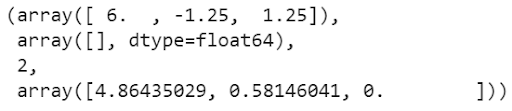

Функция возвращает четыре значения:

* вектор рассчитанных коэффициентов линейной регрессии;
* сумму квадратов ошибок, MSE (она не считается, если ранг матрицы $A$ меньше числа неизвестных, как в нашем случае);
* ранг матрицы $A$;
* вектор из сингулярных значений, которые как раз и оберегают нас от ошибки (о них мы поговорим позже).

Обратите внимание, что мы получили те же коэффициенты, что и с помощью sklearn. При этом ранг матрицы $A$ равен 2, что меньше количества неизвестных коэффициентов. Это ожидаемо говорит о вырожденности матрицы $A$ и, как следствие, матрицы $A^T A$.

**Резюмируем ↓**

* Для поиска коэффициентов модели линейной регрессии используется МНК-оценка: 

$$\vec{w}=\left(A^{T} A\right)^{-1} A^{T} \vec{y}$$

* Полученная матричная формула не зависит от размерности матрицы наблюдений $A$ и работает при любом количестве объектов/признаков в данных.

* Для реализации обучения модели линейной регрессии по МНК в sklearn используется класс LinearRegression.

* Для предотвращения обращения вырожденной матрицы $A$ в LinearRegression вместо самой матрицы используется её сингулярное разложение. Поэтому на практике при построении модели линейной регрессии вместо ручного вычисления обратной матрицы с помощью np.inv() приоритетнее пользоваться именно LinearRegression из sklearn (или np.linalg.lstsq()).

Данный метод оберегает от ошибки только при обращении плохо обусловленных и вырожденных матриц и не гарантирует получение корректных коэффициентов линейной регрессии.

In [18]:
boston_data
y = boston_data["PRICE"]
CRIM = boston_data["CRIM"]
RM = boston_data["RM"]
A = np.column_stack([np.ones(506),CRIM,RM])

w = np.linalg.inv(A.T@A)@A.T@y
w

array([-29.24471945,  -0.26491325,   8.39106825])

In [27]:
CRIM_new = 0.1
RM_new = 8
new = np.array([[1,CRIM_new,RM_new]])
print('prediction:',new@w)

prediction: [37.85733519]
